In [4]:
import numpy as np
import pandas as pd
import requests
import random
import matplotlib.pyplot as plt
# FVtyMiv9TXSjy0x4O9xmVYE2iksnAlYeEXPaD2sm
from scipy.optimize import curve_fit

In [5]:
eia_api_key = 'FVtyMiv9TXSjy0x4O9xmVYE2iksnAlYeEXPaD2sm'

In [6]:
# api_url = f'https://api.eia.gov/v2/electricity/rto/region-data/data/?frequency=hourly&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={eia_api_key}'

# headers = {
#     "X-Params": '{"frequency": "hourly", "data": ["value"], "facets": {}, "start": "2022-10-01T00", "end": "2023-10-01T00", "sort": [{"column": "period", "direction": "desc"}], "offset": 0, "length": 5000}'
# }

# response = requests.get(api_url, headers=headers)

# if response.status_code == 200:
#     data = response.json()

# else:
#     print(f"Error: {response.status_code} - {response.text}")

In [7]:
# locations = []
# types = [item['type-name'] for item in data["response"]["data"] if item['type-name'] == 'Demand']

# Demand = [item["value"] for item in data["response"]["data"] if item['type-name'] == 'Demand']

# Total_interchange = [item["value"] for item in data["response"]["data"] if item['type-name'] == 'Total Interchange']

# Net_generation = [item["value"] for item in data["response"]["data"] if item['type-name'] == 'Net Generation']

# Day_ahead = [item["value"] for item in data["response"]["data"] if item['type-name'] == 'Day-ahead Demand Forecast']



# all_values = [item["type-name"] for item in data["response"]["data"]]


# desired_responses = ["Day-ahead demand forecast", "Net generation", "Demand", "Total interchange"]

# # Create separate lists for each response
# response_data = {}
# for response in desired_responses:
#     response_data[response] = [item["value"] for item in data["response"]["data"] if item['type-name'] == response]

# # Print the data for each response
# for response, values in response_data.items():
#     print(response)
#     for value in values:
#         print(value)
#     print('\n')

# # for value in all_values:
# #   print(value)

# # for i, (type, value) in enumerate(zip(types, Demand)):
# #   print(i, type, value)
# #   print('\n')
# #print(types, values)

In [8]:
max_len = max(len(types), len(Demand), len(Total_interchange), len(Net_generation), len(Day_ahead))

# Pad lists with NaN to make them of the same length
def pad_list(lst, length):
    if len(lst) < length:
        return lst + [np.nan] * (length - len(lst))
    return lst

types = pad_list(types, max_len)
Demand = pad_list(Demand, max_len)
Total_interchange = pad_list(Total_interchange, max_len)
Net_generation = pad_list(Net_generation, max_len)
Day_ahead = pad_list(Day_ahead, max_len)

# Create the DataFrame
data = {
    'Type': types,
    'Demand': Demand,
    'Total Interchange': Total_interchange,
    'Net Generation': Net_generation,
    'Day-ahead Demand Forecast': Day_ahead
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

NameError: name 'types' is not defined

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("EIA930_BALANCE_2023_Jul_Dec(3).csv")
df = df.loc[:, 'Data Date':'Total Interchange (MW)']

/var/folders/7d/hyzwnh6n6_533550djz9zsbc0000gn/T/ipykernel_33383/2066472169.py:1: DtypeWarning: Columns (15,16,17,18,19,21,22,23,25,26,27,29,30,31,32,33,34,35,36,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("EIA930_BALANCE_2023_Jul_Dec(3).csv")


In [ ]:
def generate_fake_cost():
    # Generate random values around $50 with some variation
    base_cost = 50
    variation = random.uniform(-20, 20) # Varaition, can adjust
    return base_cost + variation

# Create the 'Electricity Cost ($)' column with fake data
df['Electricity Cost ($)'] = [generate_fake_cost() for _ in range(len(df))]

In [ ]:
def calculate_charging_rate(electricity_cost, median_cost):
    # Calculate deviation from the median
    deviation = electricity_cost - median_cost

    # Calculate the charging rate based on deviation
    if deviation < 0:
        return 1.0  # Charge at full rate
    else:
        charging_rate = max(0.2, 0.2 + (1.0 - 0.8) * (1 - deviation / median_cost))
        return charging_rate

# Calculate the median electricity cost
median_cost = df['Electricity Cost ($)'].median()

df['Charging Rate'] = df['Electricity Cost ($)'].apply(lambda x: calculate_charging_rate(x, median_cost))


In [ ]:
df.head()

,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Electricity Cost ($),Charging Rate
0,07/01/2023,1,07/01/2023 1:00:00 AM,07/01/2023 6:00:00 AM,"3,074","3,102","2,314",-788,59.416346,0.362180
1,07/01/2023,2,07/01/2023 2:00:00 AM,07/01/2023 7:00:00 AM,"2,866","2,902","2,239",-663,54.575339,0.381557
2,07/01/2023,3,07/01/2023 3:00:00 AM,07/01/2023 8:00:00 AM,"2,702","2,771","2,286",-485,58.228073,0.366936
3,07/01/2023,4,07/01/2023 4:00:00 AM,07/01/2023 9:00:00 AM,"2,597","2,654","2,347",-307,43.531337,1.000000
4,07/01/2023,5,07/01/2023 5:00:00 AM,07/01/2023 10:00:00 AM,"2,506","2,542","2,281",-261,56.838576,0.372498


In [ ]:
print(df["Charging Rate"].mean())

0.679867539922916


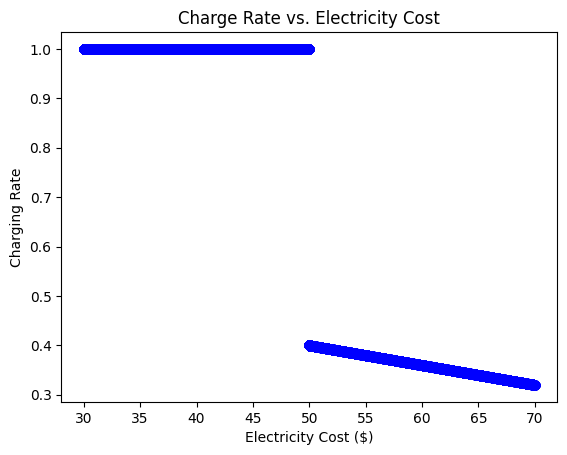

In [ ]:

# Create a scatter plot
plt.scatter(df['Electricity Cost ($)'], df['Charging Rate'], color='b', alpha=0.5)

# Set axis labels and title
plt.xlabel('Electricity Cost ($)')
plt.ylabel('Charging Rate')
plt.title('Charge Rate vs. Electricity Cost')

# Show the plot
plt.show()

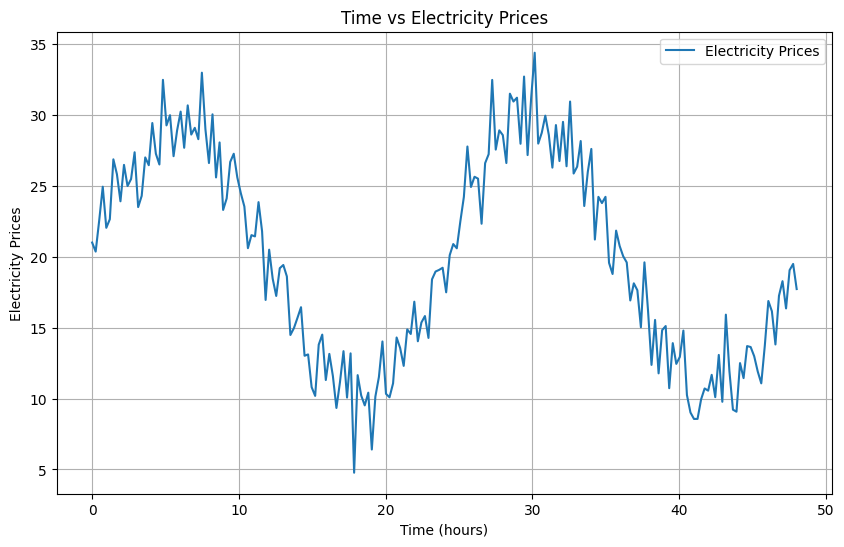

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
time = np.linspace(0, 48, 200)
base_prices = 20 + 10 * np.sin((2 * np.pi / 24) * time)
noise = np.random.normal(scale=2, size=len(time))
electricity_prices = base_prices + noise

plt.figure(figsize=(10, 6))
plt.plot(time, electricity_prices, label='Electricity Prices')
plt.title('Time vs Electricity Prices')
plt.xlabel('Time (hours)')
plt.ylabel('Electricity Prices')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}



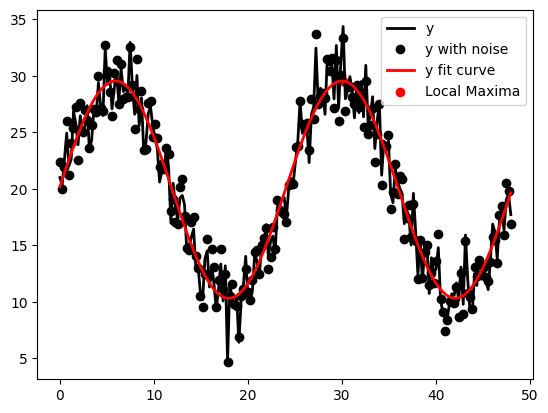

In [34]:
N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = time
tt2 = time
yy = electricity_prices
yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(tt, yynoise)

maxima_indices = argrelextrema(res["fitfunc"](tt), np.greater)

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.scatter(tt[maxima_indices], res["fitfunc"](tt)[maxima_indices], color='red', label='Local Maxima')
plt.legend(loc="best")
plt.show()

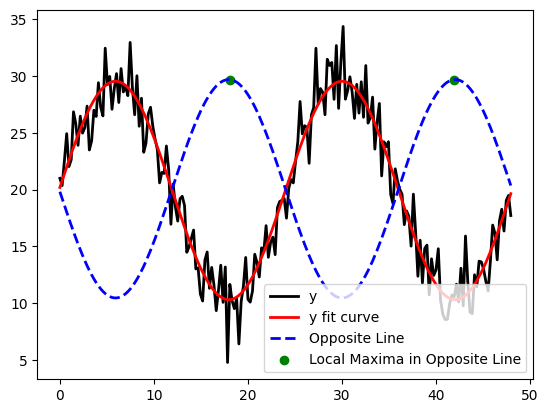

In [35]:
opposite_line = 40 - res["fitfunc"](tt)

# Find indices of local maxima in the opposite line
maxima_indices_opposite = argrelextrema(opposite_line, np.greater)

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
plt.plot(tt, opposite_line, "b--", label="Opposite Line", linewidth=2)
plt.scatter(tt[maxima_indices_opposite], opposite_line[maxima_indices_opposite], color='green', label='Local Maxima in Opposite Line')
plt.legend(loc="best")
plt.show()